In [88]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [89]:
temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()
df.index = df.index.to_series().apply(lambda x: x + 1899)
df

,x
Time,
1900,31.69
1901,29.77
1902,31.70
1903,33.06
1904,31.31
...,...
1982,34.39
1983,33.97
1984,32.15


In [90]:
def test_dic_ful(ts, name):
    alpha = 0.05
    print(f'Тест Дики-Фуллера ряда {name} :')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

In [91]:
from statsmodels.tsa.stattools import adfuller

name = "осадки"
ts = df["x"]
test_dic_ful(ts, name)

Тест Дики-Фуллера ряда осадки :
Test Statistic                 -1.714734
p-value                         0.423538
#Lags Used                      4.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [92]:
nottrend = []
s = 6
notseason = []

for i in range(1901, 1900 + len(df["x"])):
    nottrend.append(df["x"][i] - df["x"][i-1])

for i in range(1901 + s, 1900 + len(df["x"])):
    notseason.append(df["x"][i] - df["x"][i-s])

In [93]:
test_dic_ful(nottrend, name)

Тест Дики-Фуллера ряда осадки :
Test Statistic                -8.481430e+00
p-value                        1.389740e-13
#Lags Used                     3.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [94]:
test_dic_ful(notseason, name)

Тест Дики-Фуллера ряда осадки :
Test Statistic                 -3.319250
p-value                         0.014040
#Lags Used                     11.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


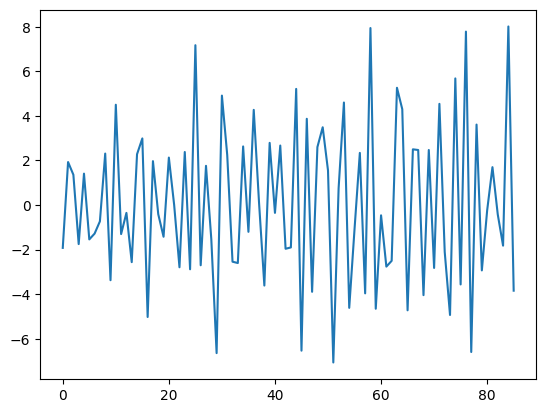

In [95]:
plt.plot(nottrend)

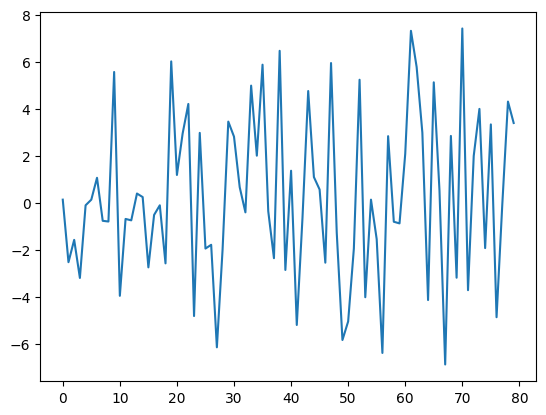

In [96]:
plt.plot(notseason)

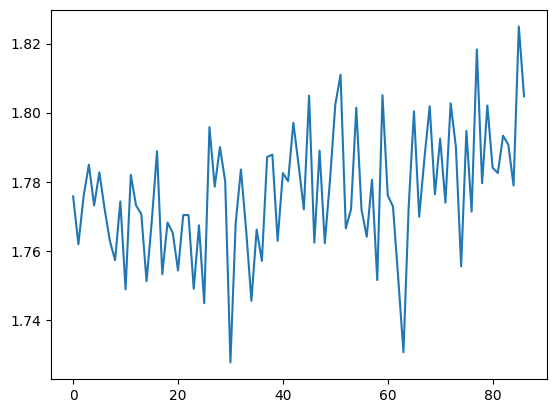

In [97]:
from scipy.stats import boxcox

transformed_data, best_lambda = boxcox(df["x"])
plt.plot(transformed_data)

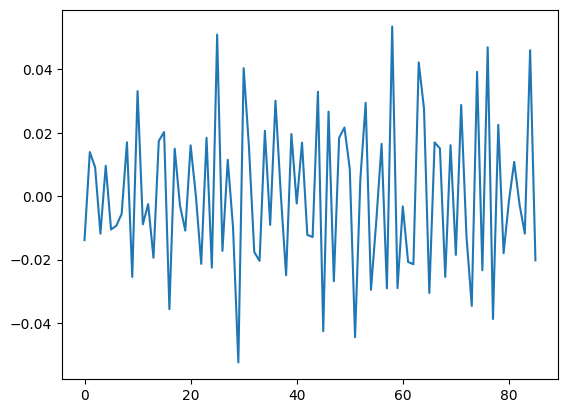

In [98]:
pnottrend = []
for i in range(1, len(transformed_data)):
    pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend)

In [99]:
test_dic_ful(pnottrend, name)

Тест Дики-Фуллера ряда осадки :
Test Statistic                -8.613033e+00
p-value                        6.399208e-14
#Lags Used                     3.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (1%)           -3.512738e+00
Critical Value (5%)           -2.897490e+00
Critical Value (10%)          -2.585949e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


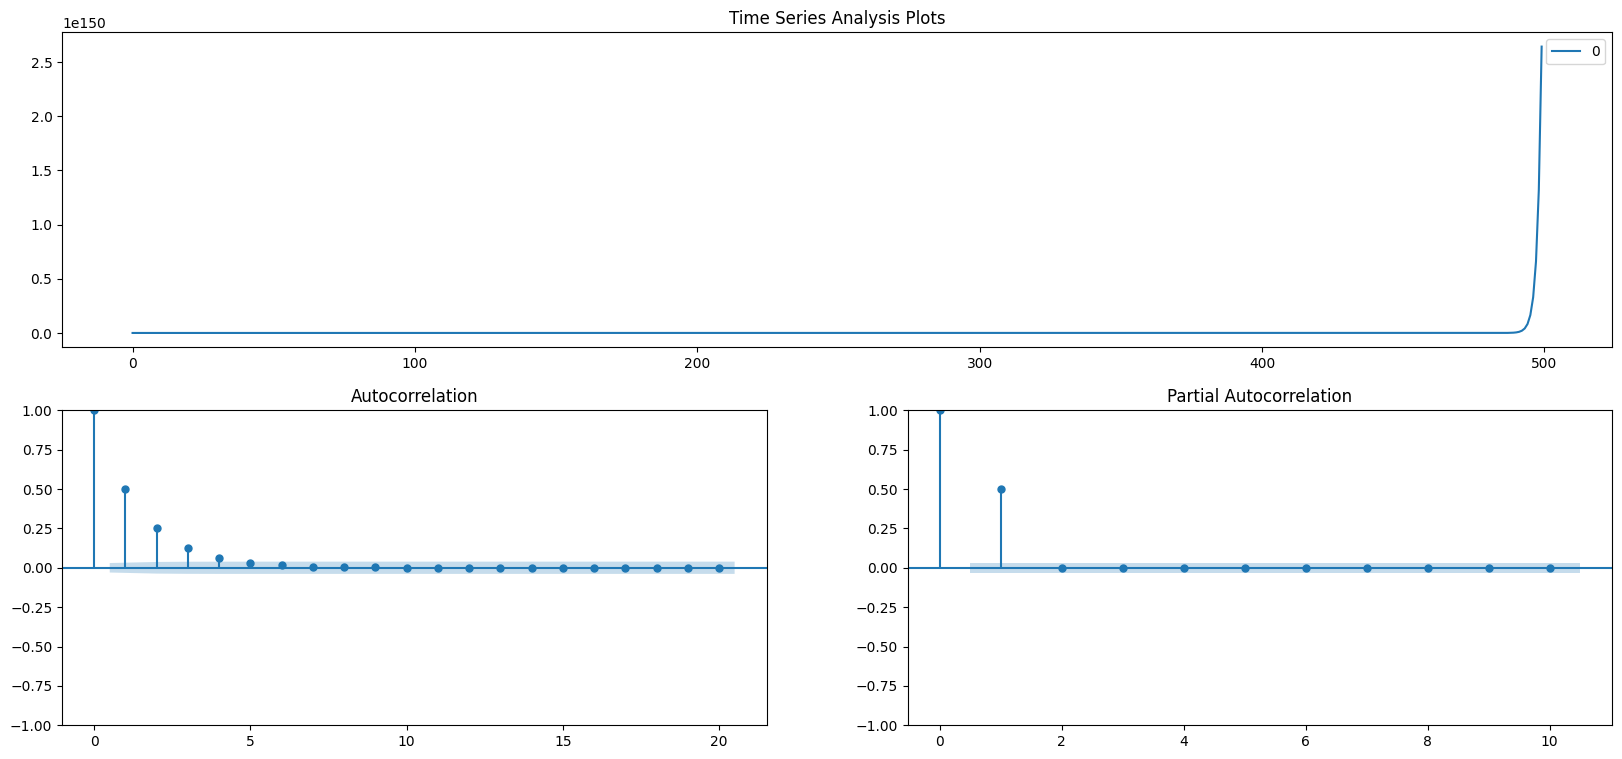

In [100]:
N = 500

ar1 = [1]

for i in range(1, N):
    ar1.append(2 * ar1[i-1] + np.random.random())

ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax =plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

In [108]:


temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()

ln = len(df)

train_cutoff = int(round(ln * 0.75, 0))
validate_cutoff = int(round(ln * 0.90, 0))

train_df = df.iloc[:train_cutoff]
validate_df = df.iloc[train_cutoff:validate_cutoff]
forecast_df = df.iloc[validate_cutoff:]


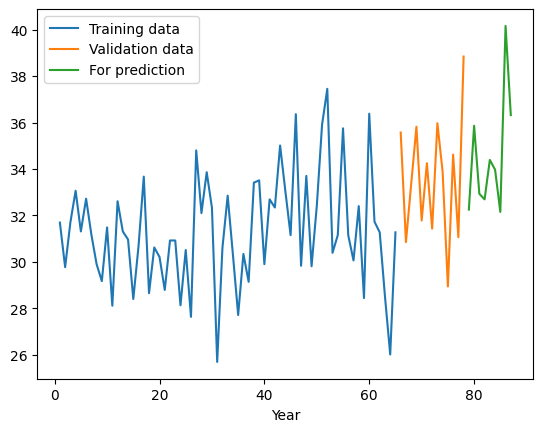

In [110]:
plt.plot(train_df.index, train_df['x'], label="Training data")
plt.plot(validate_df.index, validate_df['x'], label="Validation data")
plt.plot(forecast_df.index, forecast_df['x'], label="For prediction")
plt.legend()
plt.xlabel('Year')
plt.show()

In [114]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

mod = AutoReg(df['x'], 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                   87
Model:                     AutoReg(3)   Log Likelihood                -201.474
Method:               Conditional MLE   S.D. of innovations              2.663
Date:                Tue, 05 Dec 2023   AIC                            412.948
Time:                        15:26:31   BIC                            425.102
Sample:                             3   HQIC                           417.834
                                   87                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5589      5.623      3.478      0.001       8.537      30.580
x.L1           0.0912      0.109      0.833      0.405      -0.123       0.306
x.L2           0.1716      0.114      1.503      0.1

/Users/david/TimeSeries/HW3/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [115]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                   87
Model:                     AutoReg(3)   Log Likelihood                -201.474
Method:               Conditional MLE   S.D. of innovations              2.663
Date:                Tue, 05 Dec 2023   AIC                            412.948
Time:                        15:26:36   BIC                            425.102
Sample:                             3   HQIC                           417.834
                                   87                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5589      5.568      3.513      0.000       8.646      30.472
x.L1           0.0912      0.094      0.973      0.330      -0.092       0.275
x.L2           0.1716      0.113      1.523      0.1

In [116]:
sel = ar_select_order(df['x'], 13, old_names=False)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                   87
Model:                     AutoReg(0)   Log Likelihood                -210.016
Method:               Conditional MLE   S.D. of innovations              2.705
Date:                Tue, 05 Dec 2023   AIC                            424.031
Time:                        15:26:42   BIC                            428.963
Sample:                             0   HQIC                           426.017
                                   87                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9761      0.290    110.268      0.000      31.408      32.544


/Users/david/TimeSeries/HW3/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW3/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [121]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff + 1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(df.index[-1]), dynamic=False)


/Users/david/TimeSeries/HW3/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/david/TimeSeries/HW3/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: x and y must have same first dimension, but have shapes (65,) and (66,)

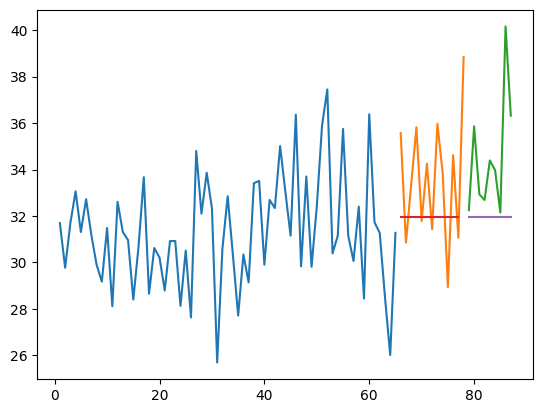

In [123]:
plt.plot(train_df.index, train_df['x'], label="Training data")
plt.plot(validate_df.index, validate_df['x'], label="Validation data")
plt.plot(forecast_df.index, forecast_df['x'], label="For prediction")
plt.plot(validate_df.index, v_pred, label="Validate data")
plt.plot(forecast_df.index, f_pred, label="Forecast data")
plt.plot(train_df.index, pred, label="Train prediction")
plt.legend()
plt.xlabel('Year')
plt.show()


In [ ]:
df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.show()

In [124]:
def symmetric_mean_absolute_percentage_error(preds, target):
    return np.mean(np.abs(preds - target) / ((np.abs(target) + np.abs(preds)) / 2))

In [125]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2:", r2_score(forecast_df.x, f_pred))
print("SMAPE:", symmetric_mean_absolute_percentage_error(forecast_df.x, f_pred))

RMSE: 3.531731177028521
MAPE: 0.06947649026114909
MAE: 2.5483524904214563
R2: -1.0861471143987247
SMAPE: 0.07414015700337986
